In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
#Parameters
Dr = 1        #s^-1 rotational diffusion coefficient
tau = 2

total_steps = 10**3  
dt = 1e-2       #time step
v_0 = 10         #maximum speed
v_inf = 0.1     #minimum speed
I_0 = 10     #W
r_0 = 1     #m


In [172]:
def orientation(w,tau):
    return np.sqrt(2/tau)*w*2*np.pi

def x_position(theta,v,dt):
    return v*np.cos(theta)*dt

def y_position(theta,v,dt):
    return v*np.sin(theta)*dt

def ligth_intensity_gaussian(I_0,r_0,x,y):
    return I_0*np.exp(-(x**2+y**2)/r_0**2)

'''def velocity_with_delay(v_inf,v_0,I,step_current,delta,dt):
    time = step_current*dt
    if delta > 0 :
        step_delay = int((time - delta)/dt)       #find step of light which robot reacts
        #step_delay = max(0,step_delay)   
        I_delay = I[step_delay]
        return v_inf + (v_0 - v_inf)*np.exp(-I_delay)
    elif delta < 0:
        step_delay = int((time - delta)/dt)
        slope = (I[step_current]-I[step_current-1])/dt
        I_delay = I[step_current] - delta*slope*step_delay
        # ensure that I_delay >= 0
        I_delay = max(0,I_delay)
        return v_inf + (v_0 - v_inf)*np.exp(-I_delay)
    else:
        I_delay = I[step_current]
        return v_inf + (v_0 - v_inf)*np.exp(-I_delay)'''
    
def velocity_with_delay(v_inf,v_0,I,step_current,delta):
    
    if delta >= 0 :
        step_delay = int((step_current - delta))       #find step of light which robot reacts
        #step_delay = max(0,step_delay)   
        I_delay = I[step_delay]
        return v_inf + (v_0 - v_inf)*np.exp(-I_delay)
    elif delta < 0:
        #step_delay = int((step_current - delta))
        slope = (I[step_current]-I[step_current-1])
        I_delay = I[step_current] - delta*slope
        # ensure that I_delay >= 0
        #I_delay = max(0,I_delay)
        return v_inf + (v_0 - v_inf)*np.exp(-I_delay)
    

def distance_from_center(x,y):
    return np.sqrt(np.square(x),np.square(y))



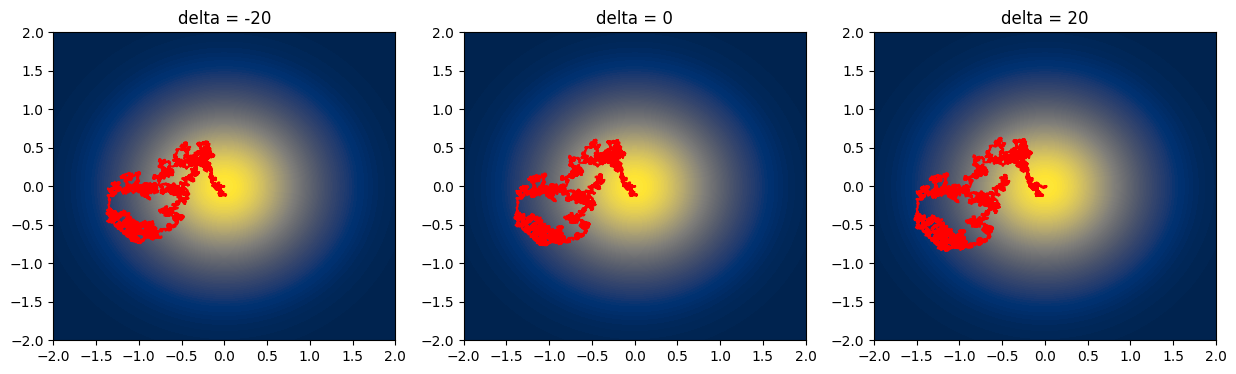

In [171]:
#10.2ab
#Paramters
total_steps = 10**4
dt = 1e-2       #time step
v_0 = 2         #maximum speed
v_inf = 0.05     #minimum speed
I_0 = 1     #W
r_0 = 1     #m
##############################


# Create delay value list
delta_list = [-10*tau,0,10*tau]

# Boundary
L = v_0*tau


plt.figure(figsize=(15,4))
plt_ind = 1
# Create a grid of x and y values
x = np.linspace(-L/2, L/2, 100)
y = np.linspace(-L/2, L/2, 100)
x, y = np.meshgrid(x, y)
# Calculate the intensity values
intensity = ligth_intensity_gaussian(I_0,r_0,x,y)


W_gaussian = np.random.randn(total_steps)

for i,delta in enumerate(delta_list):
    x_gaussian = np.zeros(total_steps)
    y_gaussian = np.zeros(total_steps)
    theta_gaussian = np.zeros(total_steps)
    I = np.zeros(total_steps)
    
    for step in range(total_steps-1):
        w = W_gaussian[step]
        
        # Compute ligth intensity at (x,y)
        I[step] = I_0*np.exp(-(x_gaussian[step]**2 + y_gaussian[step]**2)/(r_0**2))
        
        # Update v
        if delta >= 0 :
            step_delay = int(step - delta)
            if step_delay < 0:
                step_dalay = 0    
            I_delay = I[step_delay]
            v = v_inf + (v_0 - v_inf)*np.exp(-I_delay)
         
        else:
            #step_delay = int((step_current - delta))
            slope = (I[step]-I[step-1])
            I_delay = I[step] - delta*slope
            # ensure that I_delay >= 0
            I_delay = max(0,I_delay)
            v = v_inf + (v_0 - v_inf)*np.exp(-I_delay)
        #v = velocity_with_delay(v_inf,v_0,I,step,delta,dt)

        #update thetha, x,y
        theta_gaussian[step+1] = np.sqrt(2/tau)*w*2*np.pi + theta_gaussian[step]
        x_gaussian[step+1] = v*np.cos(theta_gaussian[step])*dt + x_gaussian[step]
        y_gaussian[step+1] = v*np.sin(theta_gaussian[step])*dt + y_gaussian[step]
        

        # Boundary check
        x_gaussian[step] = max(-L/2, min(x_gaussian[step], L/2))  # Ensure x stays within [-L/2, L/2]
        y_gaussian[step] = max(-L/2, min(y_gaussian[step], L/2))
        
    #plot
    plt.subplot(1,3, plt_ind)
    plt.plot(x_gaussian,y_gaussian, color ='r')
    plt.contourf(x, y, intensity,  levels=100, cmap = 'cividis' )
    plt.title(f"delta = {delta}")
    plt_ind += 1
#plt.colorbar(label='Intensity')
#plt.show()




In [108]:
def radial_distance_average(x,y):
    return np.sqrt(np.square(x)+np.square(y))

In [164]:
# 10.2c
#Paramters
total_steps = 10**6
dt = 2*1e-2       #time step
v_0 = 2         #maximum speed
v_inf = 0.05     #minimum speed
I_0 = 1     #W
r_0 = 1     #m

# Create delay value list
delta_list = [-5*tau, 0, 5*tau]

#Initial v
v = v_inf

# Boundary
L = v_0*tau

radial_distance_each_delta = np.zeros((len(delta_list),total_steps))

W_gaussian = np.random.normal(0, 1, size=(num_trajectories, total_steps))   #White - noise initialization

for i,delta in enumerate(delta_list):
    x_gaussian = np.zeros((num_trajectories,total_steps))
    y_gaussian = np.zeros((num_trajectories,total_steps))
    theta_gaussian = np.zeros((num_trajectories,total_steps))
    I = np.zeros((num_trajectories,total_steps))
    radial_distance = np.zeros((num_trajectories,total_steps))

    for step in range(total_steps-1):
        w = W_gaussian[:,step]
        #Compute ligth intensity at (x,y)
        I[:,step] = I_0*np.exp(-(x_gaussian[:,step]**2+y_gaussian[:,step]**2)/(r_0**2))
        #ligth_intensity_gaussian(I_0,r_0,x_gaussian[:,step-1],y_gaussian[:,step-1])

        # Compute the average radial distance
        radial_distance[:,step] = radial_distance_average(x_gaussian[:,step],y_gaussian[:,step])
        
        # Update v
        if delta > 0 :
            step_delay = int(step - delta)     
            I_delay = I[:,step_delay]
            v = v_inf + (v_0 - v_inf)*np.exp(-I_delay)
         
        elif delta < 0:
            #step_delay = int((step_current - delta))
            slope = (I[:,step]-I[:,step-1])
            I_delay = I[:,step] - delta*slope
            
            v = v_inf + (v_0 - v_inf)*np.exp(-I_delay)
        
        else:
            I_delay = I[:,step]
            v = v_inf + (v_0 - v_inf)*np.exp(-I_delay)
        #v = velocity_with_delay(v_inf,v_0,I,step,delta,dt)


        #update thetha, x,y
        theta_gaussian[:,step+1] = np.sqrt(2/tau)*w*2*np.pi + theta_gaussian[:,step]
        x_gaussian[:,step+1] = v*np.cos(theta_gaussian[:,step])*dt + x_gaussian[:,step]
        y_gaussian[:,step+1] = v*np.sin(theta_gaussian[:,step])*dt + y_gaussian[:,step]

        

        # Boundary check
        x_gaussian[:,step] = np.maximum(-L/2, np.minimum(x_gaussian[:,step], L/2))  # Ensure x stays within [-L/2, L/2]
        y_gaussian[:,step] = np.maximum(-L/2, np.minimum(y_gaussian[:,step], L/2))

       
    radial_distance = np.mean(radial_distance,axis=0)
    radial_distance_each_delta[i,:] = radial_distance
    

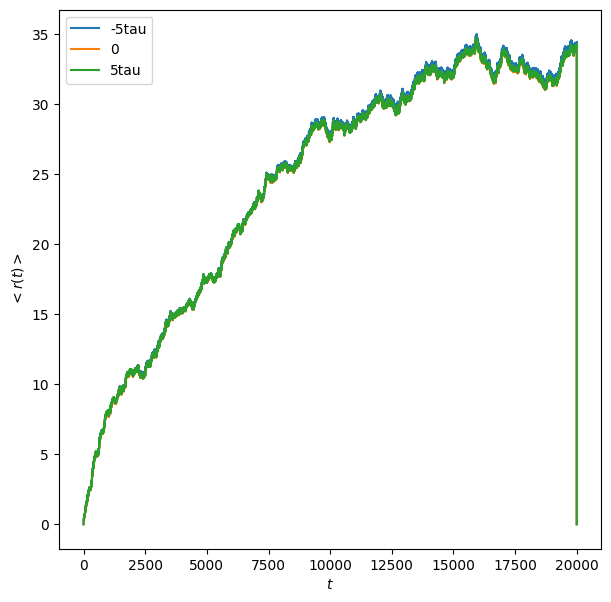

In [165]:
time_axis = np.linspace(0,total_steps*dt,num=total_steps)

#Plot
plt.figure(figsize=(7,7))
plt.plot(time_axis,radial_distance_each_delta[0,:], label ='-5tau')
plt.plot(time_axis,radial_distance_each_delta[1,:], label ='0')
plt.plot(time_axis,radial_distance_each_delta[2,:], label ='5tau')
plt.xlabel('$t$')
plt.ylabel('$<r(t)>$')
#plt.xlim(0,20)
plt.legend()


<Figure size 800x600 with 0 Axes>

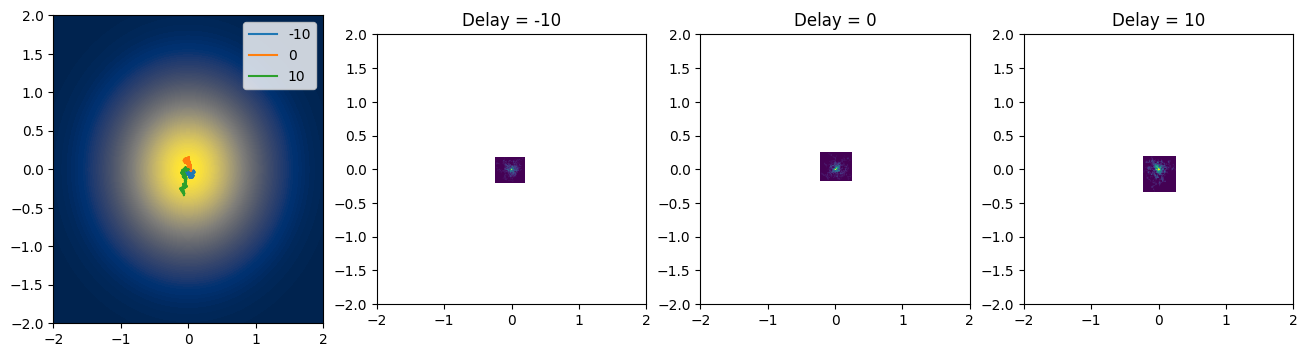

In [155]:
#Exercise 10.3
#10.3 a
#Paramters
##############################
total_steps = 10**3
num_trajectories = 10*3
dt = 1e-2       #time step
v_0 = 1         #maximum speed
v_inf = 0.1     #minimum speed
I_0 = 1     #W
r_0 = 1     #m
R = 2           #Solid Boundary
tau = 2
#############################

# Create delay value list
delta_list = [-5*tau,0,5*tau]
n_delta = len(delta_list)

x_display = np.zeros((n_delta,total_steps))
y_display = np.zeros((n_delta,total_steps))

#Initial v
v = v_inf

# Boundary
L = v_0*tau

# Initial white-noise
W_circular = np.random.normal(0, 1, size=(num_trajectories, total_steps))

plt.figure(figsize=(8,6))
plt_ind = 1
# Create a grid of x and y values
x = np.linspace(-R, R, 100)
y = np.linspace(-R, R, 100)
x, y = np.meshgrid(x, y)
# Calculate the intensity values
intensity = ligth_intensity_gaussian(I_0,r_0,x,y)

plt.figure(figsize=(16,4))

effective_drift_r = np.zeros((num_trajectories,total_steps)) 
effective_drift_r_each_delta = np.zeros((n_delta,total_steps))

for i,delta in enumerate(delta_list):
    x_circular = np.zeros((num_trajectories,total_steps))
    y_circular = np.zeros((num_trajectories,total_steps))
    theta_circular = np.zeros((num_trajectories,total_steps))
    I = np.zeros((num_trajectories,total_steps))
    r = np.zeros((num_trajectories,total_steps))
    # Initial white-noise
    W_circular = np.random.normal(0, 1, size=(num_trajectories, total_steps))

    for step in range(total_steps-1):

        w = W_circular[:,step]
        #Compute ligth intensity at (x,y)
        I[:,step] = I_0*np.exp(-(x_circular[:,step]**2+y_circular[:,step]**2)/(r_0**2))
        #ligth_intensity_gaussian(I_0,r_0,x_gaussian[:,step-1],y_gaussian[:,step-1])

        
        
        # Update v
        if delta > 0 :
            step_delay = int(step - delta)     
            I_delay = I[:,step_delay]
            v = v_inf + (v_0 - v_inf)*np.exp(-I_delay)
         
        elif delta < 0:
            #step_delay = int((step_current - delta))
            slope = (I[:,step]-I[:,step-1])
            I_delay = I[:,step] - delta*slope
            
            v = v_inf + (v_0 - v_inf)*np.exp(-I_delay)
        
        else:
            I_delay = I[:,step]
            v = v_inf + (v_0 - v_inf)*np.exp(-I_delay)
        #v = velocity_with_delay(v_inf,v_0,I,step,delta,dt)


        #update thetha, x,y
        theta_circular[:,step+1] = np.sqrt(2/tau)*w*2*np.pi + theta_circular[:,step]
        x_circular[:,step+1] = v*np.cos(theta_circular[:,step])*dt + x_circular[:,step]
        y_circular[:,step+1] = v*np.sin(theta_circular[:,step])*dt + y_circular[:,step]

        # Boundary check
        r[:,step] = radial_distance_average(x_circular[:,step],y_circular[:,step])
        if np.any(r**2) > R**2:
            x_circular[:,step] = x_circular[:,step] * R / r
            y_circular[:,step] = y_circular[:,step] * R / r

        #effective_drift_r[:,step] = r[:,step] - r[:,step-1]

    #effective_drift_r = np.mean(effective_drift_r,axis=0)
    #effective_drift_r_each_delta[i,:] = effective_drift_r
    plt.subplot(1,4,1)
    plt.plot(x_circular[i,:],y_circular[i,:], label = f'{delta}')
    plt.contourf(x, y, intensity,  levels=100,cmap = 'cividis' )
    plt.legend()
    plt.subplot(1,4,i+2)
    plt.hist2d(x_circular.flatten(), y_circular.flatten(), bins=(50, 50), cmap='viridis')
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.gca().set_aspect('equal', adjustable='box')
 
    plt.title(f'Delay = {delta}')
    

plt.show()


In [ ]:
#10.3b Compute and plot the radial drift
